# <font color = 'darkblue'> Proyecto Final </font>
#### `Paula Daniela Cárdenas Gallardo | 733720`
#### `Paulo Adrían Villa Domínguez | 733773`
#### `Proyecto de Ciencia de Datos | Cristian Camilo Zapata Zuluaga`
> **Primera entrega: 26 de octubre de 2022**

___
**`Introducción`**

Desde el 16 de mayo de 1929 la entrega del Premio de la Academia de Artes y Ciencias Cinematográficas, conocido popularmente como Premio Óscar, ha sido altamente conocido. Se entrega dicho premio de manera anual para reconocer a la excelencia y activismo social de los profesionales en la industria cinematográfica, como actores, directores y guionistas. Se considera el máximo honor en el cine. Por ello, con este trabajo se creará un modelo de aprendizaje supervisado de clasificación para predecir si una película recibirá un Premio Óscar o no.


**`Antecedentes`**

Es bien sabido que cada película es diferente y lleva a cabo un proceso distinto; algunas pueden tener un presupuesto relativamente bajo (de algunos millones de dólares) mientras que otras pueden llegar a $379$ millones de dólares, como Piratas del Caribe: En Mareas Misteriosas que ha sido la película más costosa hasta el momento (Bedard, 2022). Sin embargo, según Investopedia, el presupuesto promedio para una película de Hollywood es de $65$ milliones de dólares sin incluir la inversión de pubilicidad. Esto último en promedio cuesta la mitad que la producción; $35$ milliones de dólares aproximadamente, dando un total de $100$ milliones de dólares en promedio. Considerando que ha habido $581$ películas nominadas para la estatuilla dorada por "Mejor Película" y únicamente han ganado $94$, se creará un modelo para predecir si una película ganará dicho premio basado en diferentes características, incluyendo su presupuesto.

**`Objetivos`**
+ Generar un modelo de aprendizaje supervisado para resolver un problema de clasificación
+ Crear un API con la librería FastAPI con los *endpoints* necesarios
+ Acceder al modelo a través de una API

**`Planteamiento del problema`**

Se trabajará con un conjunto de datos con información de distintas películas con el objetivo de resolver un problema de clasificación para predecir si una película va a ganar un premio Óscar o no. Dicho conjunto de datos contiene $506$ registros (o filas) de películas y $19$ variables (o columnas), que son las siguientes:
+ **Marketing expense** $\Rightarrow$ cuánto se gastó en mercadotecnia, en millones de dólares
+ **Production expense** $\Rightarrow$ cuánto se gastó en la producción de la película, en millones de dólares
+ **Multiplex coverage** $\Rightarrow$ qué tanta cobertura tuvo en los cines
+ **Budget** $\Rightarrow$ con cuánto dinero contaban para realizar la película
+ **Movie_lenght** $\Rightarrow$ duración de la película
+ **Lead_actor_rating** $\Rightarrow$ rating del actor principal
+ **Lead_Actrees_rating** $\Rightarrow$ rating de la actriz principal
+ **Director_rating** $\Rightarrow$ rating del director
+ **Producer_rating** $\Rightarrow$ rating del productor
+ **Critic_rating** $\Rightarrow$ rating de las críticas
+ **Trailer_views** $\Rightarrow$ cantidad de visitas en el trailer
+ **3D_available** $\Rightarrow$ si la película está disponible en 3D o no
+ **Time_taken** $\Rightarrow$ semanas que les tomó hacer la película
+ **Twitter_hastags** $\Rightarrow$ cantidad de hastags en twitter
+ **Genre** $\Rightarrow$ género de la película
+ **Avg_age_actors** $\Rightarrow$ promedio de la edad de los actores
+ **Num_multiplex** $\Rightarrow$ número de cines en los que fue transmitida la película
+ **Collection** $\Rightarrow$ ganancia monetaria
+ **Start_tech_Oscar** $\Rightarrow$ si ganó el premio Óscar o no (variable de respuesta)

___
**`EDA`**

In [1]:
# Importar librerías
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

warnings.filterwarnings('ignore')

In [2]:
# Importar datos
data = pd.read_csv('Movie_classification.csv')
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
# Conocer los datos
# El tamaño de los datos se visualiza en una tupla; primero la cantidad de filas y después el número de columnas
print(f'\n+ Dimensión de los datos: \n {data.shape}')

# Tipo de cada variable
print(f'\n+ Tipo de datos por columna: \n{data.dtypes}')

# Conteo de valores nulos
print(f'\n+ Cantidad de nulos por columna: \n{data.isnull().sum()}')

# Valores únicos
print(f'\n+ Valores únicos por columna: \n{data.nunique()}')


+ Dimensión de los datos: 
 (506, 19)

+ Tipo de datos por columna: 
Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
dtype: object

+ Cantidad de nulos por columna: 
Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_ava

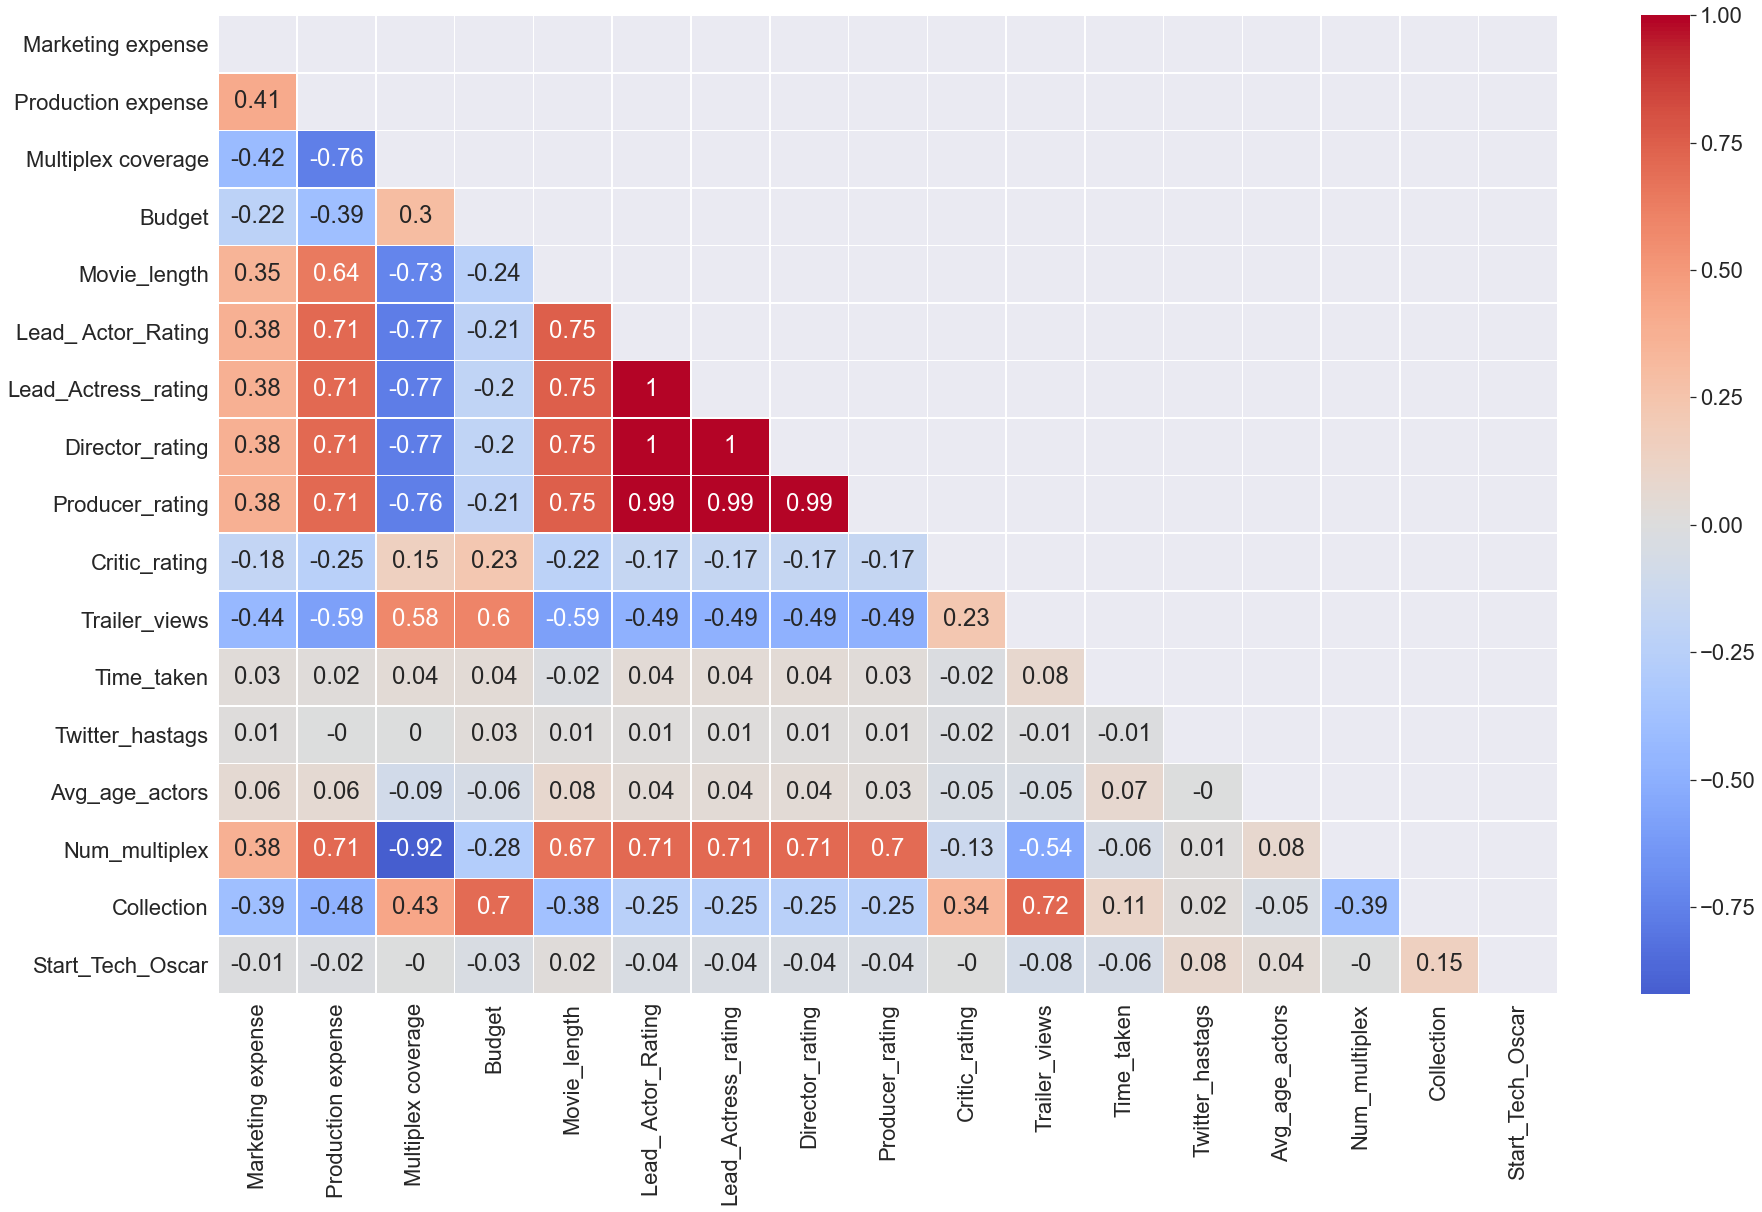

In [4]:
# Correlation matrix of the dataset
corr = data.corr()
# Mask to get only the lower diagonal of the matrix
low_diag = np.triu(corr)
# Set the font size in seaborn graphs
sns.set(font_scale=2)
plt.figure(figsize=(30,18))
sns.heatmap(data=corr.round(2), vmax=1, center=0, annot=True, cmap='coolwarm', linewidths=0.5, mask=low_diag)
plt.show()

Variables eliminadas por correlación baja
- Multiplex coverage
- Critic_rating
- Num_multiplex

Variables eliminadas por correlación arriba de 90
- Lead_Actress_rating
- Director_rating
- Producer_rating

In [5]:
data.drop(columns=["Multiplex coverage", "Critic_rating", "Num_multiplex", "Lead_Actress_rating", "Director_rating", "Producer_rating"], inplace=True)
data.head()

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Collection,Start_Tech_Oscar
0,20.1264,59.62,36524.125,138.7,7.825,527367,YES,109.60,223.840,Thriller,23,48000,1
1,20.5462,69.14,35668.655,152.4,7.505,494055,NO,146.64,243.456,Drama,42,43200,0
2,20.5458,69.14,39912.675,134.6,7.485,547051,NO,147.88,2022.400,Comedy,38,69400,1
3,20.6474,59.36,38873.890,119.3,6.895,516279,YES,185.36,225.344,Drama,45,66800,1
4,21.3810,59.36,39701.585,127.7,6.920,531448,NO,176.48,225.792,Drama,55,72400,1


## Eliminación de datos atípicos

In [6]:
data = data[data.Time_taken > 100]
data = data[data.Twitter_hastags < 400]
data.head()

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Collection,Start_Tech_Oscar
0,20.1264,59.62,36524.125,138.7,7.825,527367,YES,109.60,223.840,Thriller,23,48000,1
1,20.5462,69.14,35668.655,152.4,7.505,494055,NO,146.64,243.456,Drama,42,43200,0
3,20.6474,59.36,38873.890,119.3,6.895,516279,YES,185.36,225.344,Drama,45,66800,1
4,21.3810,59.36,39701.585,127.7,6.920,531448,NO,176.48,225.792,Drama,55,72400,1
5,20.5970,59.36,35718.650,132.2,6.890,498425,YES,143.48,284.592,Comedy,53,57400,0


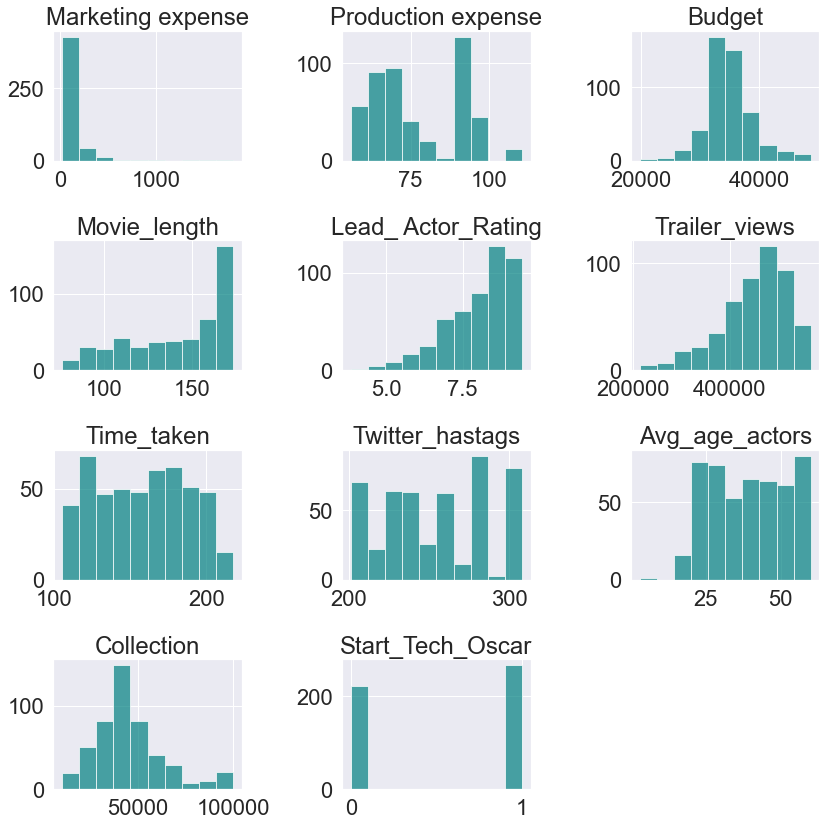

In [7]:
data.hist(color= 'teal', alpha= 0.7, bins= 10, figsize= (12, 12))
plt.tight_layout()
plt.show()

Variables a escalar:

Min max scaler:
- Production expense
- Time_taken
- Avg_age_actors
- Twitter_hashtags
- Time_taken


Standar scaler:
- Marketing expense
- Budget
- Collection
- Trailer_views
- Movie_length
- Lead_Actor_Rating


In [8]:
standard = ["Marketing expense", "Budget", "Collection", "Trailer_views", "Movie_length", "Lead_ Actor_Rating"]
minmax = ["Production expense", "Time_taken", "Avg_age_actors", "Time_taken", "Twitter_hastags"]
finales = minmax+standard

___
**`Data Wrangling`**

**Tratamiento de valores nulos**

In [9]:
# Al eliminar variables quitamos la única variable con datos nulos.
data.isna().sum()

Marketing expense     0
Production expense    0
Budget                0
Movie_length          0
Lead_ Actor_Rating    0
Trailer_views         0
3D_available          0
Time_taken            0
Twitter_hastags       0
Genre                 0
Avg_age_actors        0
Collection            0
Start_Tech_Oscar      0
dtype: int64

**Tratamiento de variables categóricas**

In [10]:
# Observar cuántos valores únicos hay para ver cómo convertir a numéricas
print(data['3D_available'].unique())
print('\n', data['Genre'].unique())

['YES' 'NO']

 ['Thriller' 'Drama' 'Comedy' 'Action']


In [11]:
# Convertir a variables numéricas con la función `get_dummies()`
data = pd.get_dummies(data, drop_first=True)
data['3D_available'] = data['3D_available_YES']
data = data.drop('3D_available_YES', axis=1)
dummys = [x for x in data.columns if x not in finales]
data.head()

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available
0,20.1264,59.62,36524.125,138.7,7.825,527367,109.60,223.840,23,48000,1,0,0,1,1
1,20.5462,69.14,35668.655,152.4,7.505,494055,146.64,243.456,42,43200,0,0,1,0,0
3,20.6474,59.36,38873.890,119.3,6.895,516279,185.36,225.344,45,66800,1,0,1,0,1
4,21.3810,59.36,39701.585,127.7,6.920,531448,176.48,225.792,55,72400,1,0,1,0,0
5,20.5970,59.36,35718.650,132.2,6.890,498425,143.48,284.592,53,57400,0,1,0,0,1


**Escalamiento de datos**

In [12]:
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

respuesta = ['Start_Tech_Oscar']
predictoras = [c for c in data.columns if c not in respuesta]

# Dividir los datos en entrenamiento y prueba para no tener leakage al hacer el escalamiento
X_train, X_test, y_train, y_test = train_test_split(data[predictoras], data[respuesta], test_size=0.2)

### Escalamiento

In [13]:
# Min max scaler
scaler_min = preprocessing.MinMaxScaler()
x_train_minmax = pd.DataFrame(scaler_min.fit_transform(X_train[minmax]), columns=minmax)
# Standard scaler
scaler_std = preprocessing.StandardScaler()
x_train_std = pd.DataFrame(scaler_std.fit_transform(X_train[standard]), columns=standard)
# Juntamos las variables
x_train = pd.merge(x_train_minmax, x_train_std, left_index=True, right_index=True)
x_train = pd.merge(x_train, data[dummys], left_index=True, right_index=True)

___
**`Dataset final a trabajar`**

In [14]:
# Datos finales para entrenamiento
x_train

,Production expense,Time_taken,Avg_age_actors,Time_taken,Twitter_hastags,Marketing expense,Budget,Collection,Trailer_views,Movie_length,Lead_ Actor_Rating,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available
0,0.646628,0.597361,1.000,0.597361,0.005541,1.480409,0.351759,-1.244312,-0.985038,1.091334,1.064035,1,0,0,1,1
1,0.296921,0.349857,0.950,0.349857,0.028901,-0.420467,0.675386,0.408464,0.584167,0.103861,0.415163,0,0,1,0,0
3,0.646628,0.496077,0.775,0.496077,0.404762,0.115243,-3.740198,0.514411,1.109489,0.693503,1.135079,1,0,1,0,1
4,0.700880,0.146220,0.950,0.146220,0.392633,-0.175036,-0.794647,-0.343761,-0.567337,1.070022,1.064035,1,0,1,0,0
5,0.063050,0.294936,0.875,0.294936,0.043276,-0.427604,1.299327,1.425557,1.081681,-0.968860,-0.034785,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.073314,0.798146,0.750,0.798146,0.232105,-0.427284,0.948274,1.542099,0.790135,-0.354354,0.434108,1,0,0,0,0
388,0.236437,0.324536,0.350,0.324536,0.759509,-0.403636,-1.219750,-0.873497,-2.700405,0.956356,-0.925208,1,0,1,0,0
389,0.073314,0.371255,1.000,0.371255,0.786613,-0.422185,0.376443,1.044147,0.613261,0.967012,0.467262,1,0,0,0,0
390,0.038856,0.878031,0.575,0.878031,0.789757,-0.429711,1.351436,1.266637,0.994197,-1.068318,-1.659334,0,0,0,1,1


___
**`Modelo`**

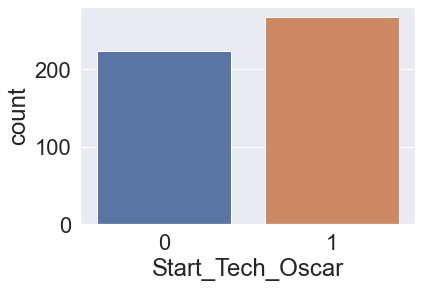

In [15]:
# Distribución de la variable de respuesta
sns.countplot(x='Start_Tech_Oscar', data=data)
plt.show()

In [16]:
def test_models(X_train, y_train, X_test, y_test):
    # Inicializar objeto
    logreg= LogisticRegression()
    # Ajustar modelo a datos de entrenamiento
    logreg.fit(X_train, y_train)
    # Predecir con datos del test
    y_pred_logreg = logreg.predict(X_test)
    # Evaluar el modelo
    accu_log= accuracy_score(y_test, y_pred_logreg)
    prec_log= precision_score(y_test, y_pred_logreg, average='weighted')
    reca_log= recall_score(y_test, y_pred_logreg, average='weighted')

    model_svc= SVC(kernel= 'rbf')
    model_svc.fit(X_train, y_train)
    Yhat_svc= model_svc.predict(X_test)
    accu_svc= accuracy_score(y_test,Yhat_svc)
    prec_svc= precision_score(y_test,Yhat_svc,average= 'weighted')
    reca_svc= recall_score(y_test,Yhat_svc,average= 'weighted')
    
    # Construcción y entrenamiento de la bolsa de modelos
    modelo = RandomForestClassifier(n_estimators= 100, criterion= 'gini',max_depth= 10,
                                    min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto',
                                    bootstrap= True, oob_score =False, random_state= 0, verbose= 2)

    modelo = modelo.fit(X_train, y_train) # predicción con la bolsa de modelos
    Yhat = modelo.predict(X_test)
    # Evaluar del modelo
    accu_rf = accuracy_score(y_test,Yhat)
    prec_rf = precision_score(y_test,Yhat,average='weighted')
    reca_rf = recall_score(y_test,Yhat,average='weighted')
    
    compare_models = {'Modelo': ['LR', 'SVC', 'RF'], 'Accuracy': [accu_log, accu_svc , accu_rf],
                         'Precision': [prec_log, prec_svc, prec_rf],
                         'Recall': [reca_log, reca_svc, reca_rf]} 
    compare_models = pd.DataFrame(compare_models)
    return compare_models, logreg, modelo

In [17]:
results, log_reg, rf_mod = test_models(X_train, y_train, X_test, y_test)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [18]:
results

,Modelo,Accuracy,Precision,Recall
0,LR,0.673469,0.671912,0.673469
1,SVC,0.551020,0.303623,0.551020
2,RF,0.653061,0.659694,0.653061


## Selección del modelo.

In [19]:
# Nos quedamos con el modelo random forest (En general muestra mejores resultados).
rf_mod

RandomForestClassifier(max_depth=10, random_state=0, verbose=2)

In [20]:
import pickle
filename = 'rf_classifier.pkl'
pickle.dump(rf_mod, open(filename,'wb'))

___
**`Referencias Bibliográficas`**

Bedard, M. (2022). *Average Movie Budget — How Much Do Movies Cost to Make?*. Consultado el 20 de octubre de 2022, de [www.studiobinder.com](https://www.studiobinder.com/blog/average-movie-budget/#:~:text=However%2C%20according%20to%20Investopedia%2C%20the,much%20as%20the%20production%20costs.)

NBC Universal. (2022). *Complete list of every 'Best Picture' Oscar winner ever*. Consultado el 20 de octubre de 2022, de [www.today.com](https://www.today.com/popculture/complete-list-every-best-picture-oscar-winner-ever-t107617)

The Academy of Motion Picture Arts and Sciences. (2022). *History*. Consultado el 20 de octubre de 2022, de [www.oscars.org](https://www.oscars.org/nicholl/history)